# Imports

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import torch

# Loading Data

In [2]:
df = pd.read_csv('data/superstore_data.csv', index_col='Id')

display(df.head())

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
Id,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,...,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,...,7,0,37,1,7,3,7,5,1,0
10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,...,15,2,30,1,3,2,5,2,0,0
1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,...,0,0,0,1,1,0,2,7,0,0
5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,...,11,0,34,2,3,1,2,7,1,0


# Determining Missing Data

In [3]:
for col in df.columns:
    nan_count = df[col].isna().sum()
    print(f'{col} has {nan_count} missing values')

Year_Birth has 0 missing values
Education has 0 missing values
Marital_Status has 0 missing values
Income has 24 missing values
Kidhome has 0 missing values
Teenhome has 0 missing values
Dt_Customer has 0 missing values
Recency has 0 missing values
MntWines has 0 missing values
MntFruits has 0 missing values
MntMeatProducts has 0 missing values
MntFishProducts has 0 missing values
MntSweetProducts has 0 missing values
MntGoldProds has 0 missing values
NumDealsPurchases has 0 missing values
NumWebPurchases has 0 missing values
NumCatalogPurchases has 0 missing values
NumStorePurchases has 0 missing values
NumWebVisitsMonth has 0 missing values
Response has 0 missing values
Complain has 0 missing values


# Imputing Missing Data

### Creating Column for Missing Income

In [4]:
column = 'Income'

df['Missing_Income'] = df[column].isna().astype(int)

display(df.head())
display(df.info())

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Missing_Income
Id,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,...,189,218,1,4,4,6,1,1,0,0
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,...,0,37,1,7,3,7,5,1,0,0
10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,...,2,30,1,3,2,5,2,0,0,0
1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,...,0,0,1,1,0,2,7,0,0,0
5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,...,0,34,2,3,1,2,7,1,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 1826 to 4070
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   int

None

### Converting strings to categorical

In [5]:
mappings = {}
for col in df.columns:
    if df[col].dtype == 'object' and col != 'Dt_Customer':
        names = df[col].unique()
        mapping = {name: i for i, name in enumerate(names)}
        df[col] = df[col].map(mapping)
        mappings[col] = mapping

display(df.head())

for map in mappings:
    print(f'{map} has mapping {mappings[map]}')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Missing_Income
Id,,,,,,,,,,,,,,,,,,,,,
1826,1970,0,0,84835.0,0,0,6/16/2014,0,189,104,...,189,218,1,4,4,6,1,1,0,0
1,1961,0,1,57091.0,0,0,6/15/2014,0,464,5,...,0,37,1,7,3,7,5,1,0,0
10476,1958,0,2,67267.0,0,1,5/13/2014,0,134,11,...,2,30,1,3,2,5,2,0,0,0
1386,1967,0,3,32474.0,1,1,11/5/2014,0,10,0,...,0,0,1,1,0,2,7,0,0,0
5371,1989,0,1,21474.0,1,0,8/4/2014,0,6,16,...,0,34,2,3,1,2,7,1,0,0


Education has mapping {'Graduation': 0, 'PhD': 1, '2n Cycle': 2, 'Master': 3, 'Basic': 4}
Marital_Status has mapping {'Divorced': 0, 'Single': 1, 'Married': 2, 'Together': 3, 'Widow': 4, 'YOLO': 5, 'Alone': 6, 'Absurd': 7}


### Data Imputer

In [6]:
class IncomeImputer(nn.Module):
    def __init__(self, input_dim, h_dim, output_dim, num_layers, device, verbose=True):
        super(IncomeImputer, self).__init__()
        self.input_dim = input_dim
        self.h_dim = h_dim
        self.output_dim = output_dim
        self.num_layers = num_layers
        self.activation = nn.ReLU()
        self.device = device
        self.verbose = verbose

        layers = []

        for i in range(num_layers):
            if i == 0:
                layers.append(nn.Linear(input_dim, h_dim))
                layers.append(self.activation)
            elif i == num_layers - 1:
                layers.append(nn.Linear(h_dim, output_dim))
            else:
                layers.append(nn.Linear(h_dim, h_dim))
                layers.append(self.activation)
        
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)

    def fit(self, X, y, epochs=1000, lr=1e-3, weight_decay=1e-5):
        optimizer = torch.optim.Adam(self.parameters(), lr=lr, weight_decay=weight_decay)
        criterion = nn.L1Loss()

        X = torch.tensor(X, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.float32)

        train_loader = DataLoader(
            TensorDataset(X, y),
            batch_size=32,
            shuffle=True
        )

        self.to(self.device)

        for epoch in range(epochs):
            for bx, by in train_loader:

                bx = bx.to(self.device)
                by = by.to(self.device)

                optimizer.zero_grad()
                y_pred = self(bx)
                loss = criterion(y_pred, by)
                loss.backward()
                optimizer.step()

            if epoch % 5 == 0 and self.verbose:
                print(f'Epoch {epoch}, loss {loss.item()}')
        
        return self
    
    def predict(self, X):
        X = torch.tensor(X, dtype=torch.float32).to(self.device)
        return self(X).detach().cpu().numpy()



## Training Imputers

In [7]:
columns = df.columns

X_names = columns.drop(['Income', 'Dt_Customer' ,'Missing_Income'])
y_name = 'Income'


x_train = df.loc[df['Missing_Income'] == 0, X_names].values
y_train = df.loc[df['Missing_Income'] == 0, y_name].values

## Training Imputers

### Neural Network

In [8]:
imputer = IncomeImputer(len(X_names), 200, 1, 3, 'cuda', verbose=False)
imputer = imputer.fit(x_train, y_train[:, None], epochs=300, lr=1e-4)

loss_func = nn.L1Loss()
pred = imputer.predict(x_train)
loss = loss_func(torch.tensor(pred), torch.tensor(y_train[:, None]))

print(f'Final loss {loss.item()}')

Final loss 8075.8537756303585


### Random Forest

In [9]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf = rf.fit(x_train, y_train)

loss = nn.L1Loss()(torch.tensor(rf.predict(x_train)), torch.tensor(y_train))
print(f'Random Forest Loss: {loss}')


Random Forest Loss: 2287.482364620939


## Imputing data

In [10]:
income_nan_rows = df[df['Missing_Income'] == 1]
x_impute = income_nan_rows[X_names].values

imputed = rf.predict(x_impute)

df.loc[df['Missing_Income'] == 1, 'Income'] = imputed

df.to_csv('data/superstore_data_imputed.csv', index=True)

## Visualizing Numerical Variables

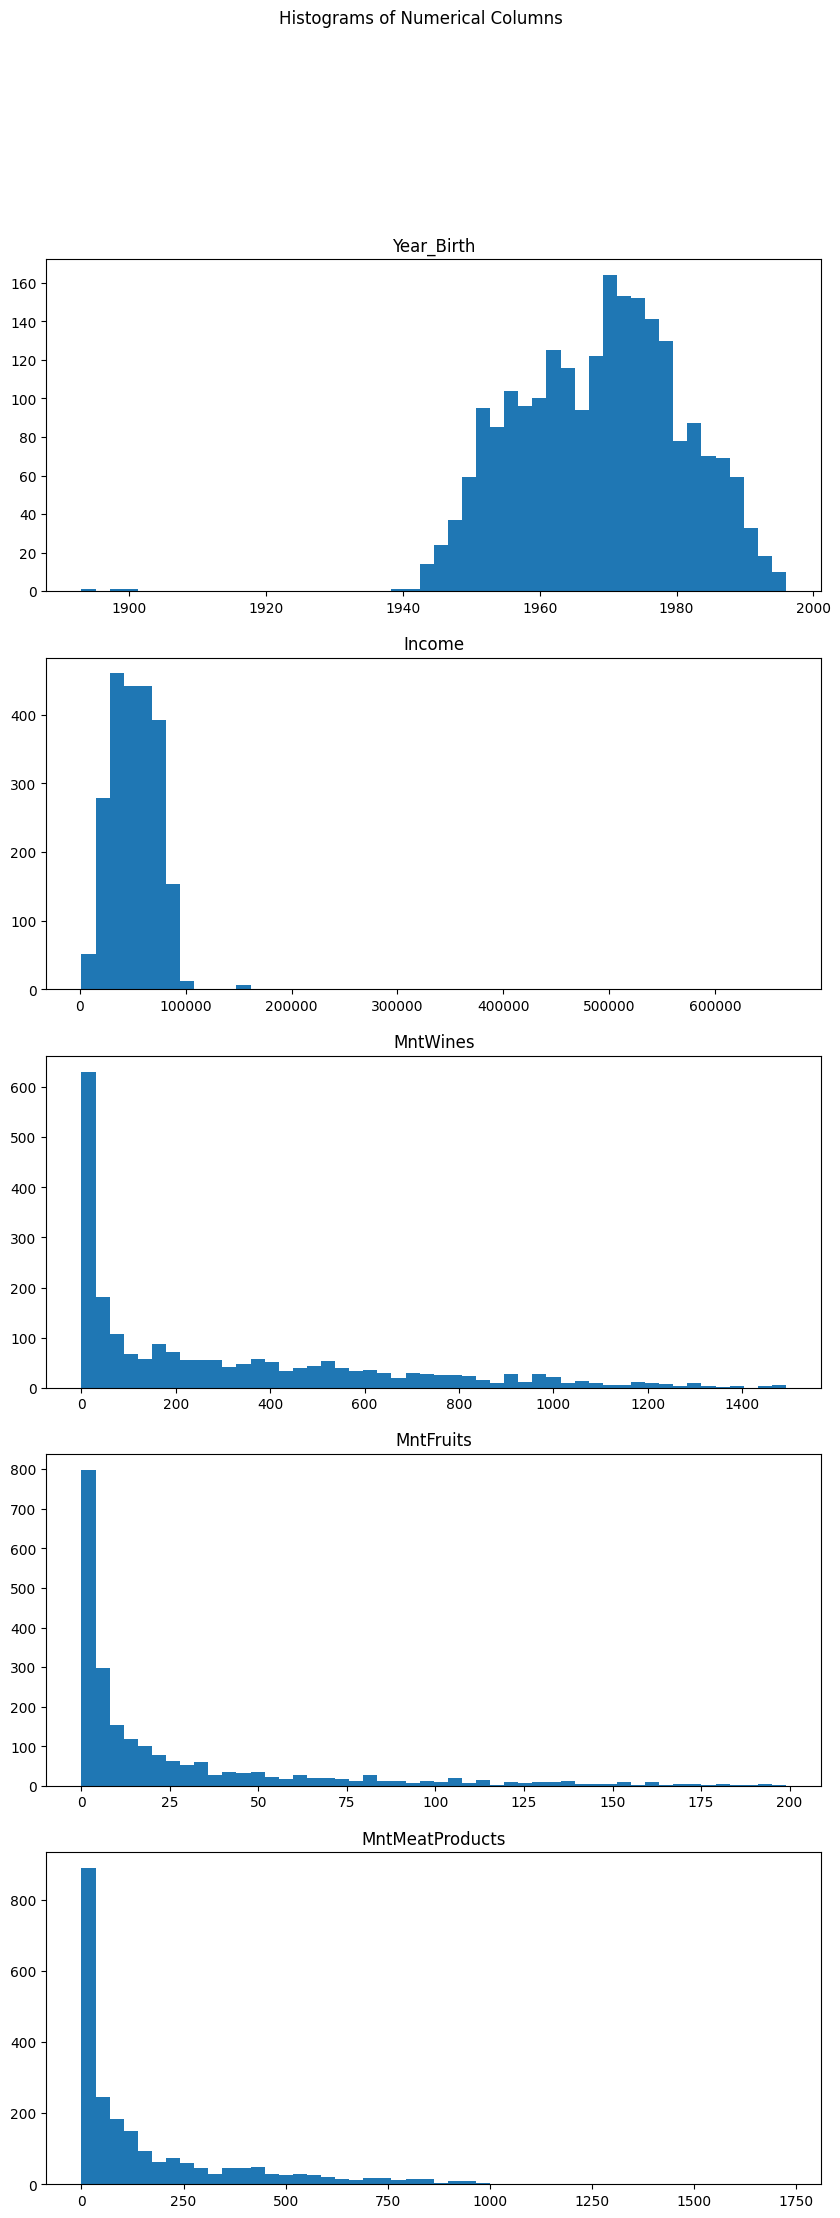

In [11]:
numerical_cols = ['Year_Birth', 'Income', 'MntWines', 'MntFruits',
       'MntMeatProducts']

fig, axs = plt.subplots(len(numerical_cols), 1, figsize=(10, 5*len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    axs[i].hist(df[col], bins=50, )
    axs[i].set_title(col)

plt.suptitle('Histograms of Numerical Columns')
plt.show()

## Visualizing Categorical Variables

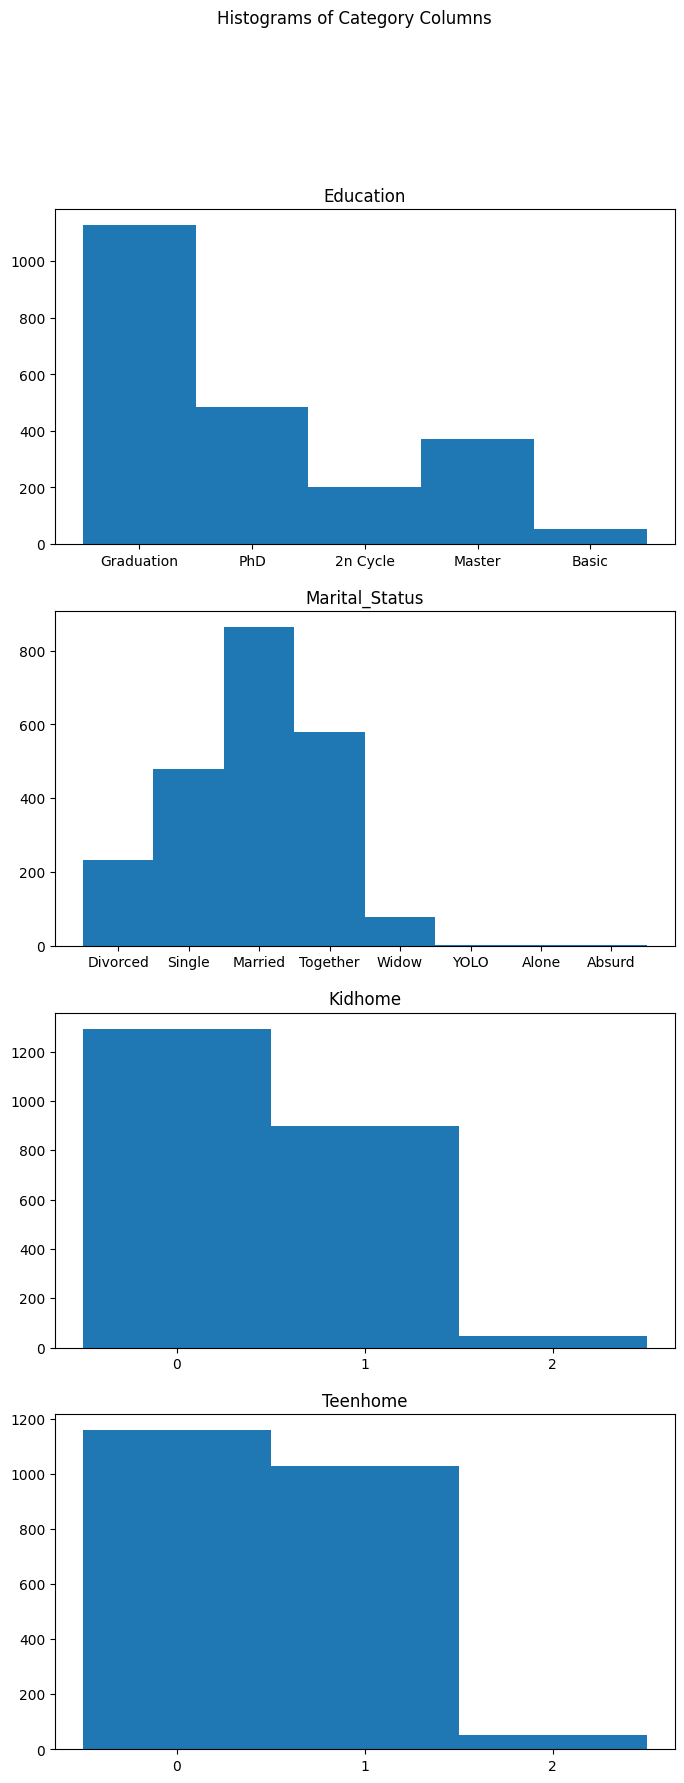

In [27]:
category_cols = ['Education', 'Marital_Status', "Kidhome", "Teenhome"]

fig, axs = plt.subplots(len(category_cols), 1, figsize=(8, 5*len(category_cols)))

for i, col in enumerate(category_cols):
    if col in mappings:
        axs[i].hist(df[col], bins=range(len(mappings[col])+1), align='left')
        axs[i].set_title(col)
        axs[i].set_xticks(list(mappings[col].values()))
        axs[i].set_xticklabels(list(mappings[col].keys()))
    else:
        bins = np.arange(4)
        axs[i].hist(df[col], bins=bins, align='left')
        axs[i].set_title(col)
        axs[i].set_xticks([0, 1, 2])
        axs[i].set_xticklabels(['0', '1', '2'])

plt.suptitle('Histograms of Category Columns')
plt.show()

## Visualizing purchase relationships

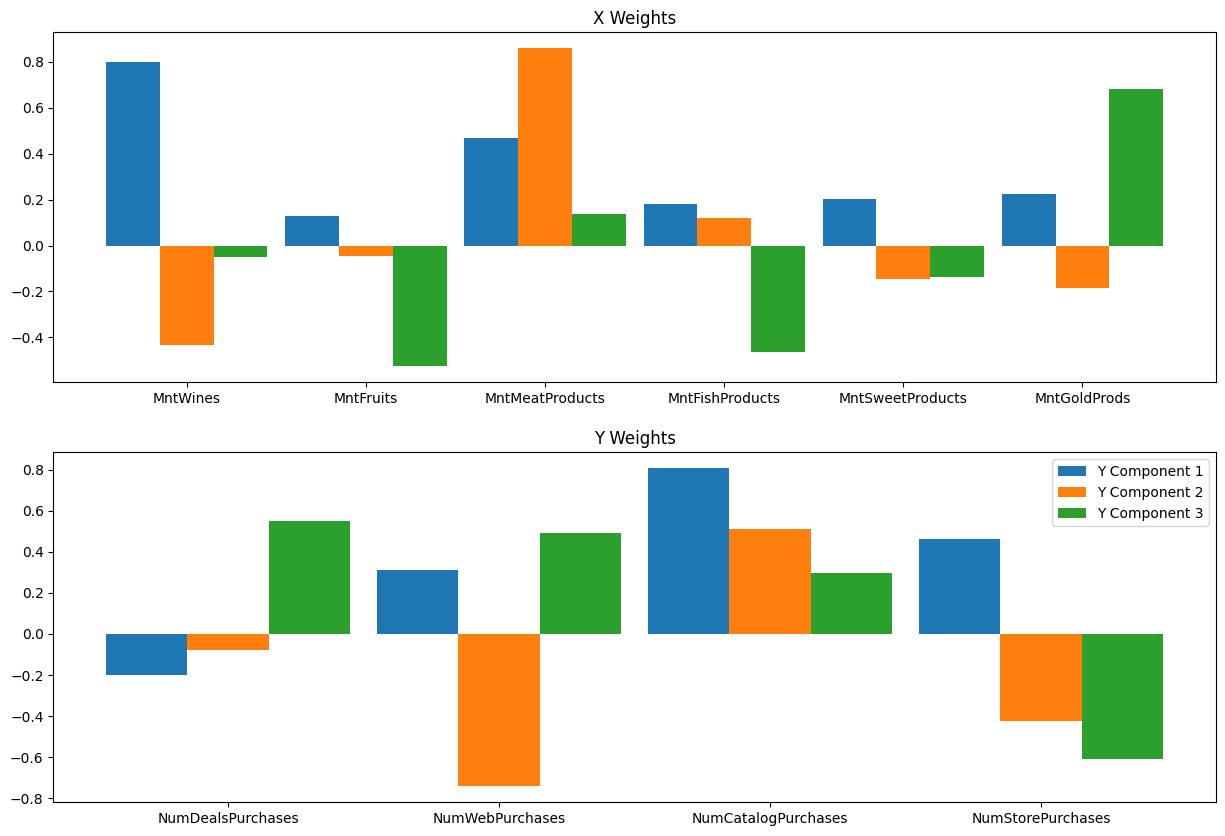

In [13]:
from sklearn.cross_decomposition import CCA

volume_cols = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds'
]

purchase_cols = ['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases'
]

x = df[volume_cols].values
y = df[purchase_cols].values

num_components = 3

cca = CCA(n_components=num_components)

cca = cca.fit(x, y)

x_weights = cca.x_weights_
y_weights = cca.y_weights_

fig, ax = plt.subplots(2, 1, figsize=(15,10))

width = 0.3
weight_x = np.arange(1,len(volume_cols)+1)
weight_y = np.arange(1,len(purchase_cols)+1)

for i in range(num_components):
    ax[0].bar(weight_x+i*width, x_weights[:, i], width, label=f'X Component {i+1}')
    ax[1].bar(weight_y+i*width, y_weights[:, i], width, label=f'Y Component {i+1}')

ax[0].set_xticks(weight_x + width)
ax[0].set_xticklabels(volume_cols)
ax[0].set_title('X Weights')

ax[1].set_xticks(weight_y + width)
ax[1].set_xticklabels(purchase_cols)
ax[1].set_title('Y Weights')


plt.legend()
plt.show()



## Visualizing Demographics and Purchasing

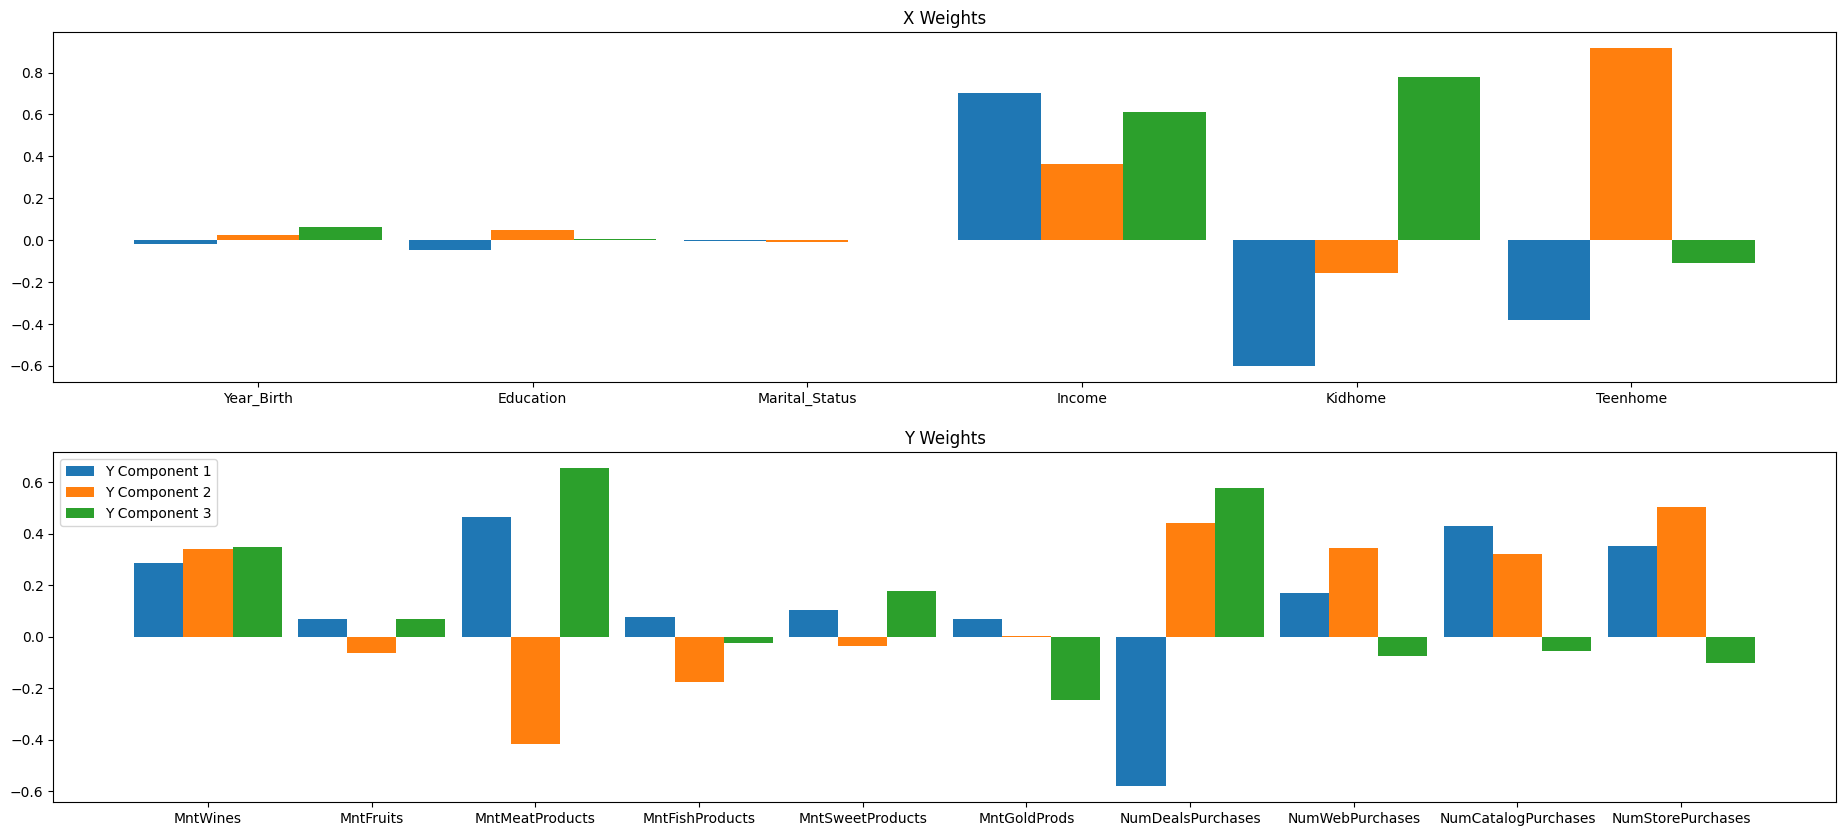

In [14]:
demographic_cols = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome']

spending_cols = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts',
                  'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']

x = df[demographic_cols].values
y = df[spending_cols].values

num_components = 3

cca = CCA(n_components=num_components)

cca = cca.fit(x, y)

x_weights = cca.x_weights_
y_weights = cca.y_weights_

fig, ax = plt.subplots(2, 1, figsize=(23,10))

width = 0.3
weight_x = np.arange(1,len(demographic_cols)+1)
weight_y = np.arange(1,len(spending_cols)+1)

for i in range(num_components):
    ax[0].bar(weight_x+i*width, x_weights[:, i], width, label=f'X Component {i+1}')
    ax[1].bar(weight_y+i*width, y_weights[:, i], width, label=f'Y Component {i+1}')

ax[0].set_xticks(weight_x + width)
ax[0].set_xticklabels(demographic_cols)
ax[0].set_title('X Weights')

ax[1].set_xticks(weight_y + width)
ax[1].set_xticklabels(spending_cols)
ax[1].set_title('Y Weights')


plt.legend()
plt.show()

## Visualization

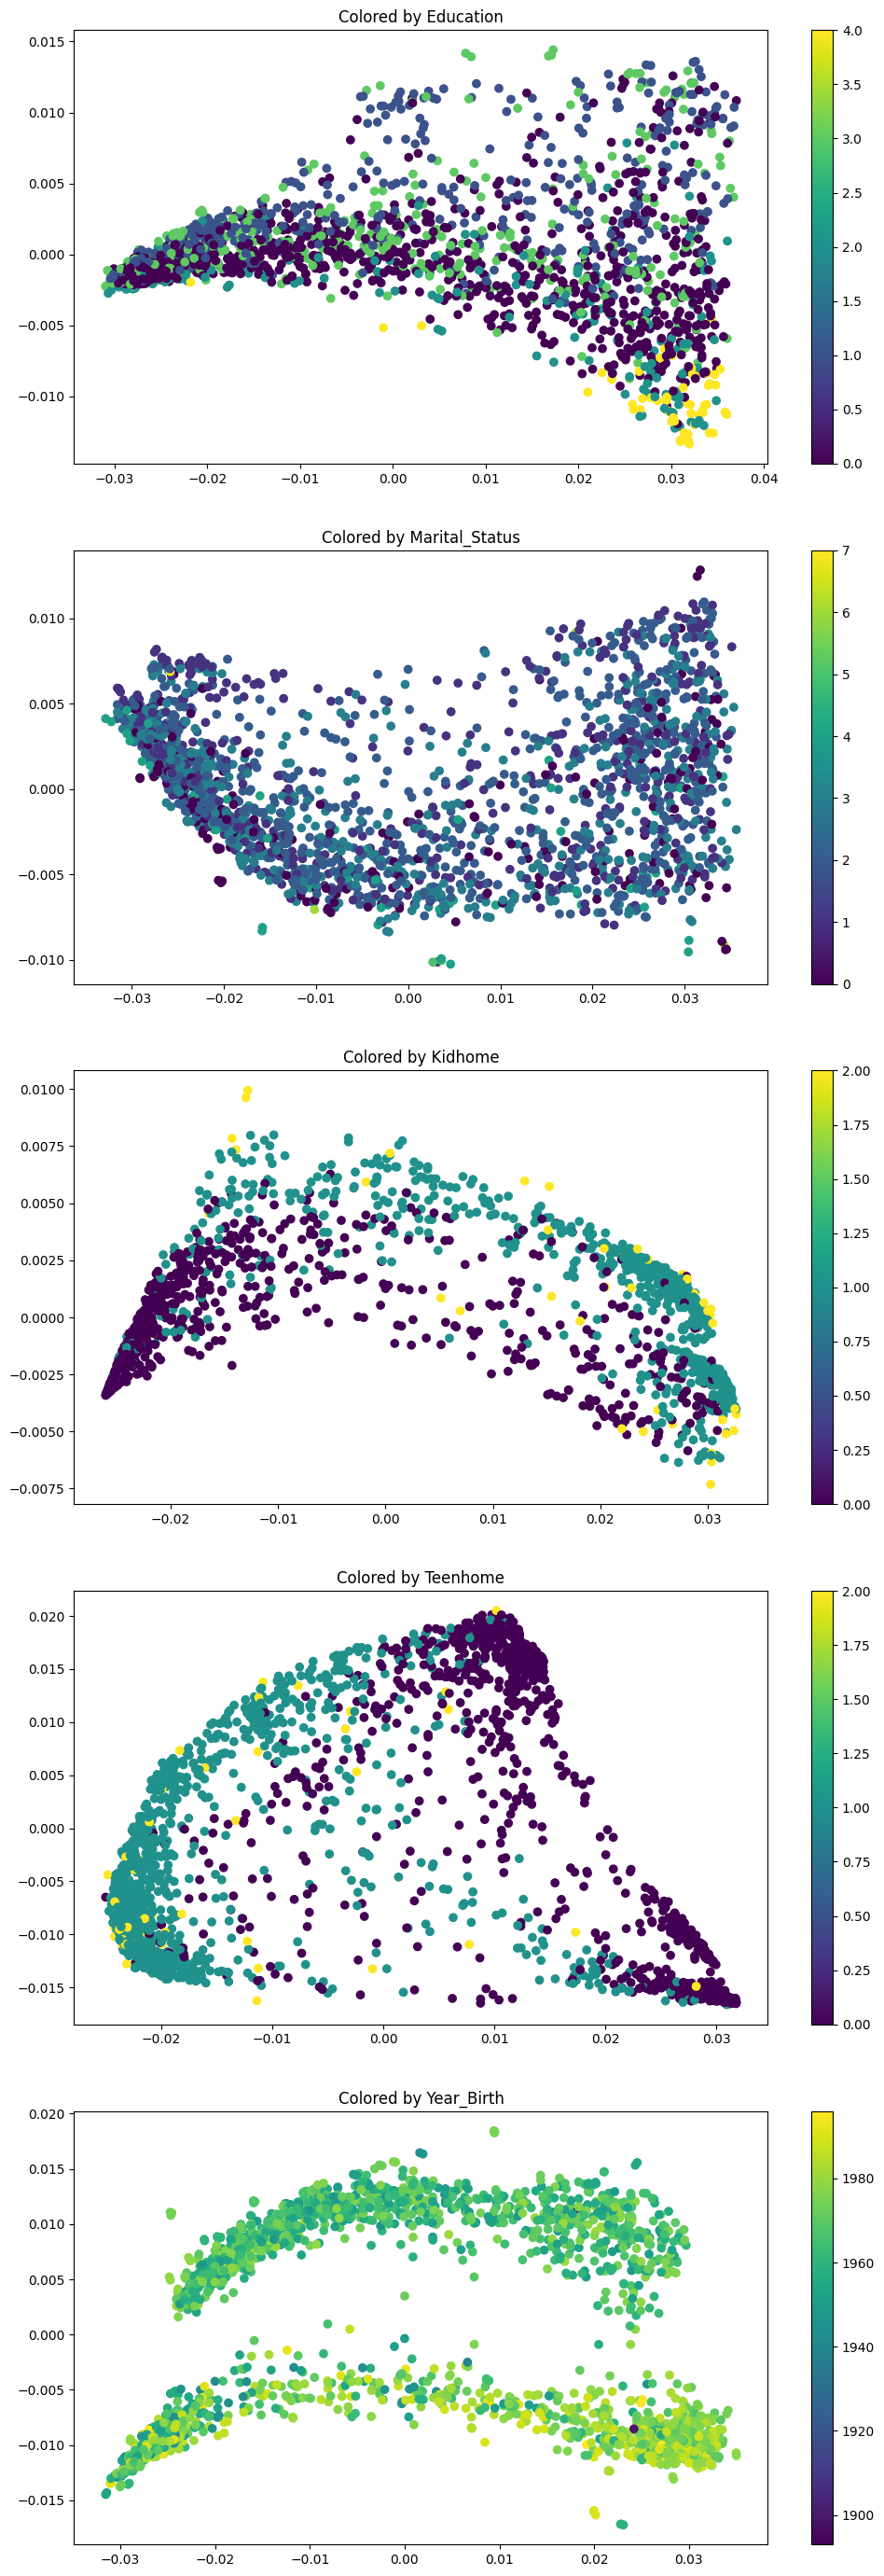

In [49]:
from rfphate import RFPHATE
from rfphate.dataprep import dataprep

x_cols = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']


coloring_cols = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Year_Birth']


embeddings = []

fig, axs = plt.subplots(5, 1, figsize=(12, 7*5))

for i, col in enumerate(coloring_cols):

    x_cols_removed = [x for x in x_cols if x != col]

    x = np.array(df[x_cols_removed])
    y = np.array(df[col])

    if col == "Income":
        x = x[y < 200000]
        y = y[y < 200000]
        rfphate = RFPHATE(prediction_type='regression', n_components=2, n_jobs=8, random_state=42)
    else:
        rfphate = RFPHATE(n_components=2, n_jobs=8, random_state=42)

    embedding = rfphate.fit_transform(x, y)

    embeddings.append(embedding)
    
    c = axs[i].scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='viridis')
    axs[i].set_title(f"Colored by {col}")
    plt.colorbar(c, ax=axs[i])

plt.show()

## K-means Clustering

/home/codygrogan/.local/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


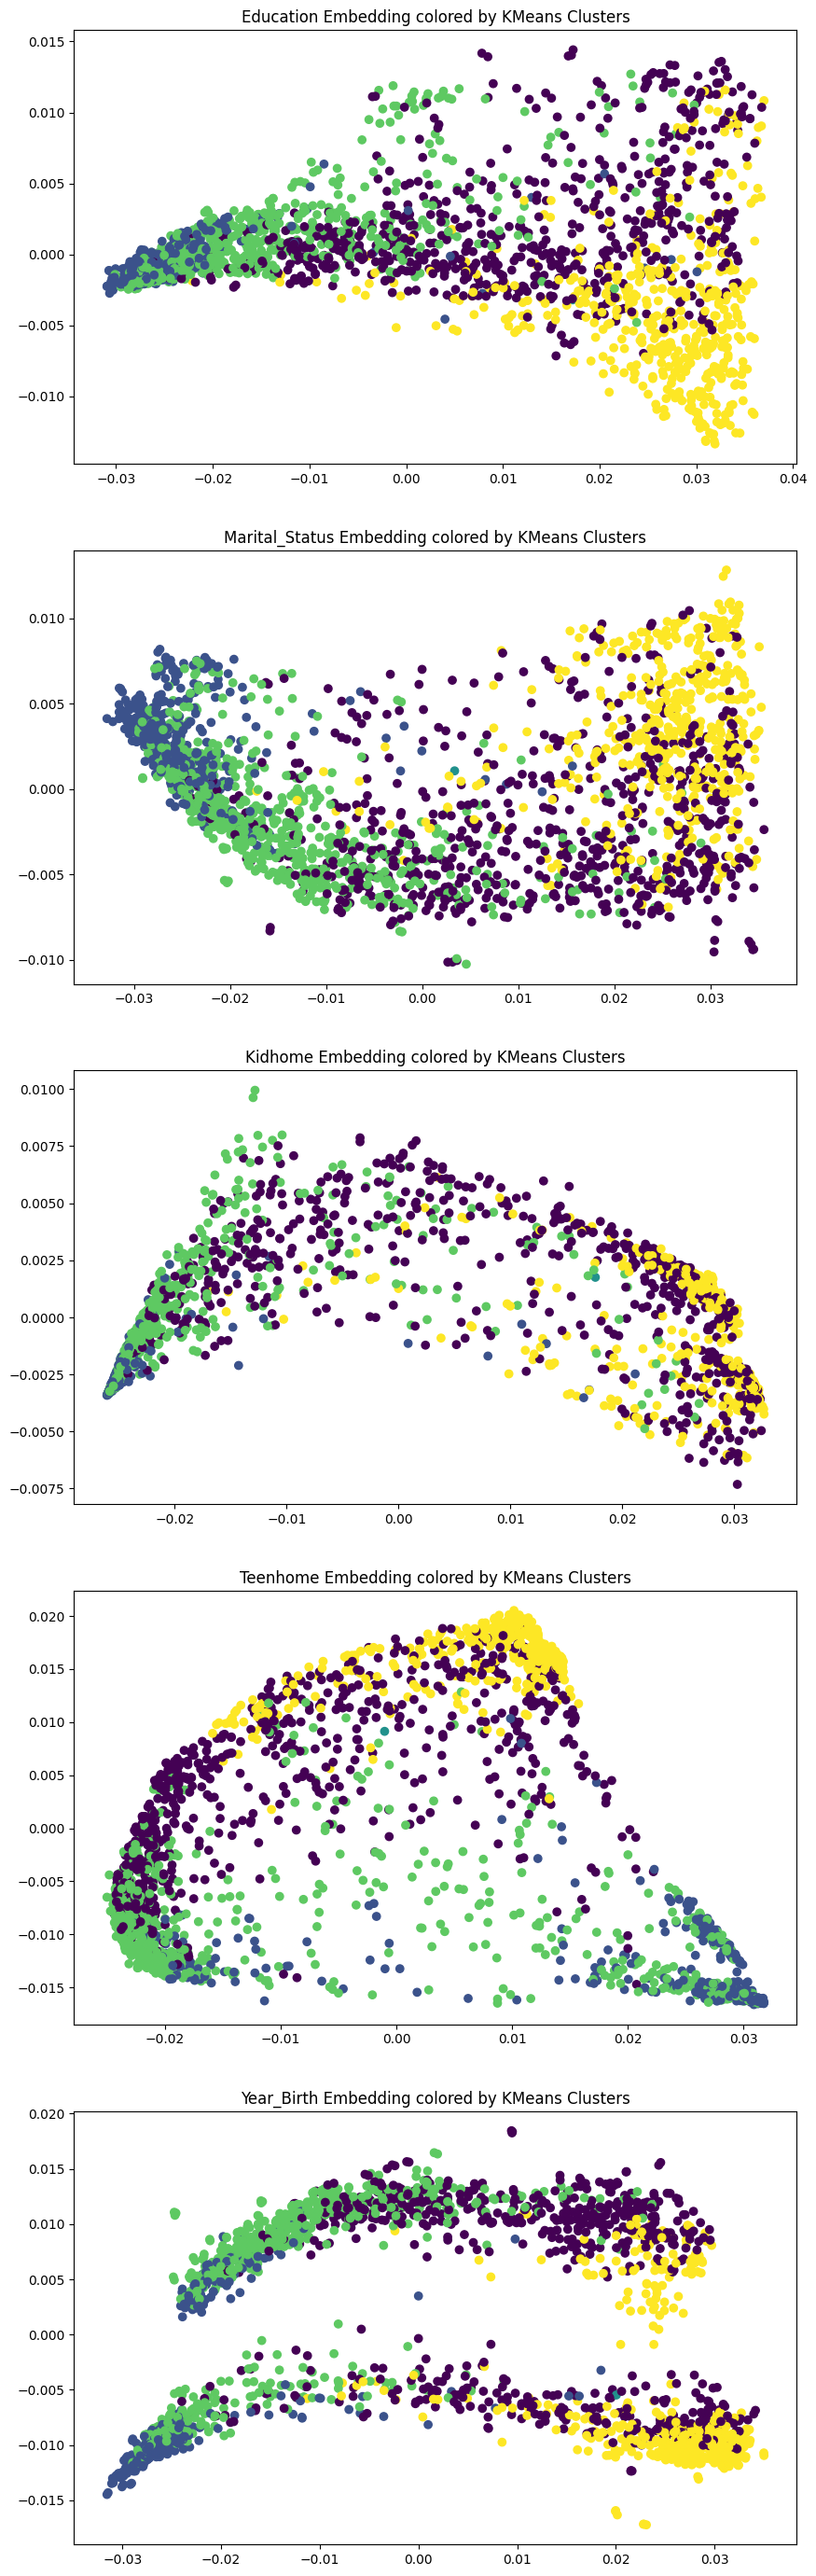

In [50]:
from sklearn.cluster import KMeans

behavior_cols = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(df[behavior_cols])

fig, axs = plt.subplots(5, 1, figsize=(10, 7*5))

for i, embed in enumerate(embeddings):
    axs[i].scatter(embed[:, 0], embed[:, 1], c=kmeans.labels_, cmap='viridis')
    axs[i].set_title(f"{coloring_cols[i]} Embedding colored by KMeans Clusters")

plt.show()

## Time Series Plots

/tmp/ipykernel_104618/3741408913.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time.sort_values(by='Dt_Customer', inplace=True)


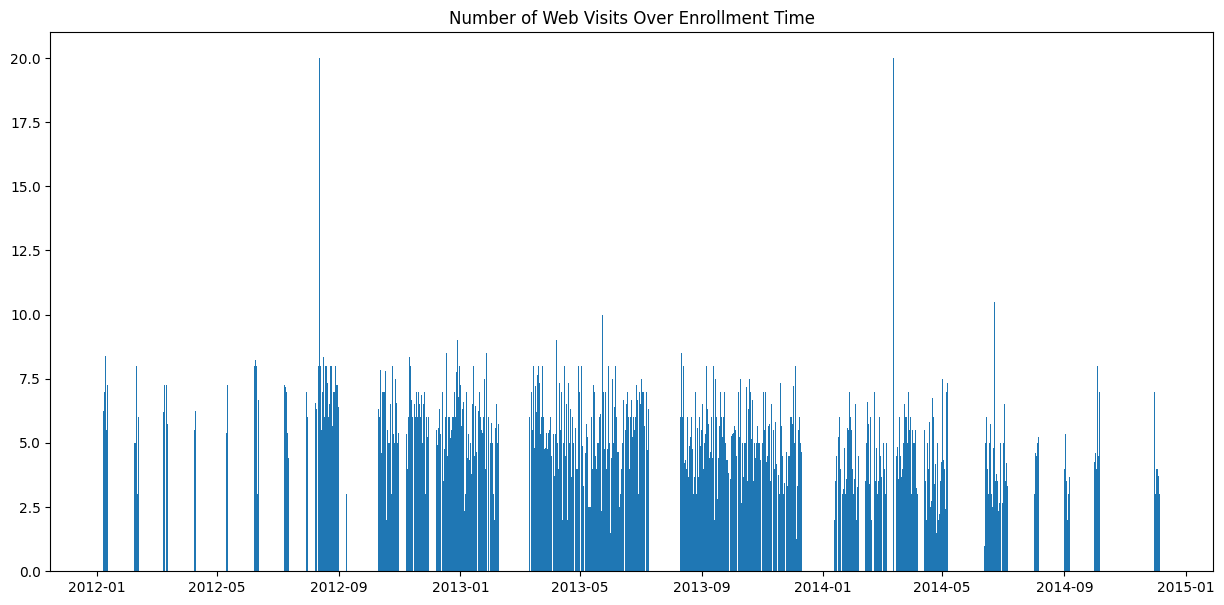

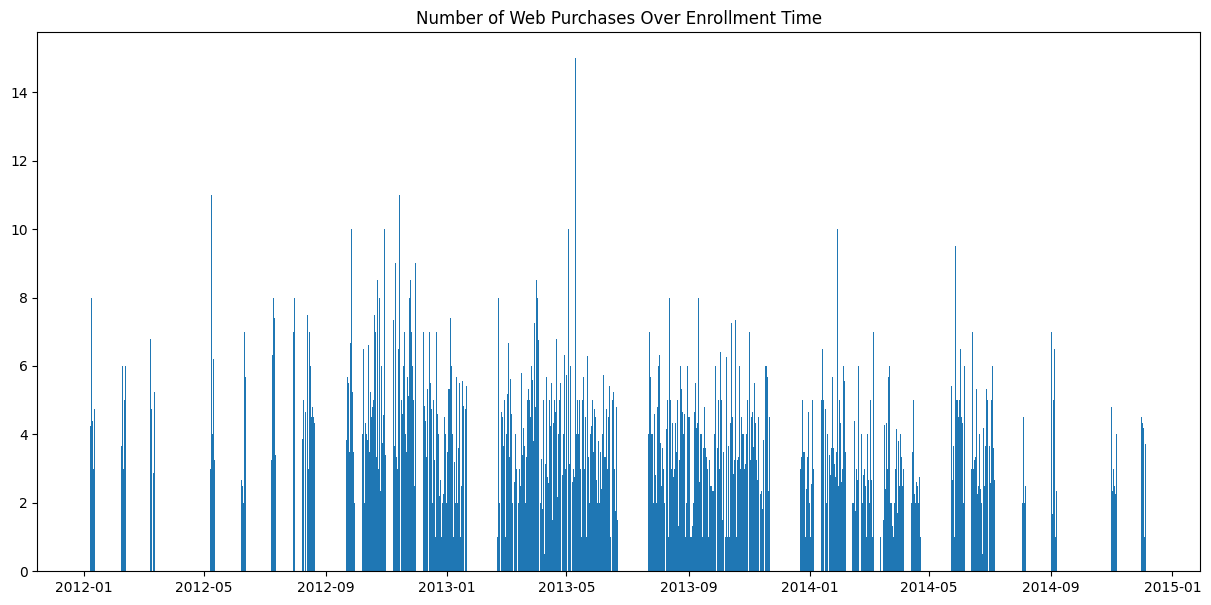

In [52]:
timeseries_cols = ['Dt_Customer', 'NumWebVisitsMonth', 'NumWebPurchases']

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df_time = df[timeseries_cols]

df_time.sort_values(by='Dt_Customer', inplace=True)

df_time = df_time.groupby('Dt_Customer')[timeseries_cols[1:]].mean().reset_index()

plt.figure(figsize=(15, 7))
plt.bar(df_time['Dt_Customer'], df_time['NumWebVisitsMonth'])
plt.title('Number of Web Visits Over Enrollment Time')

plt.figure(figsize=(15, 7))
plt.bar(df_time['Dt_Customer'], df_time['NumWebPurchases'])
plt.title('Number of Web Purchases Over Enrollment Time')

plt.show()
